# SD212: Graph mining
## Lab 1: Sampling nodes and edges

You will learn to:
* use the networkx package
* sample nodes / edges

## 1. The networkx package

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

### First graph

In [5]:
# Building the graph
graph = nx.Graph(name = "My first graph")
graph.add_edge(1,2)
graph.add_edge(2,3)

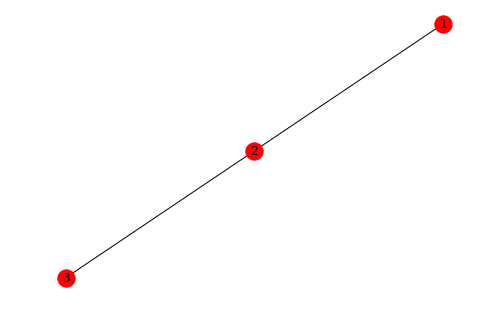

In [91]:
# Visualization
#plt.figure()
nx.draw(graph, with_labels=True)
plt.show()

In [18]:
# Summary
print(nx.info(graph))

Name: My first graph
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [19]:
# List of nodes 
nodes = list(graph.nodes())
print(nodes)

[1, 2, 3]


In [20]:
# Iterator on nodes
for u in graph.nodes():
    print (u)

1
2
3


In [21]:
# First node through the list / the iterator
nodes_iter = iter(graph.nodes())
print(nodes[0])
print(next(nodes_iter))

1
1


## To do

* Get the second node using the list and the iterator
* Get the first edge using the list of edges and the iterator on edges

In [22]:
print(nodes[1])
print(next(nodes_iter))

2
2


In [23]:
edges_list = list(graph.edges())
edges_iter = iter(graph.edges())
print(edges_list[0])
print(next(edges_iter))

(1, 2)
(1, 2)


### Second graph

In [24]:
# Building the graph
social_graph = nx.Graph(name = "A social graph")
social_graph.add_edge('Albert','Barbara')
social_graph.add_edge('Albert','Carol')
social_graph.add_edge('Barbara','Dan')
social_graph.add_edge('Albert','Dan')

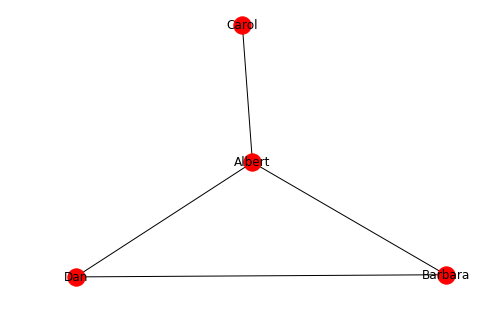

In [27]:
# Visualization
plt.figure()
nx.draw(social_graph, with_labels = True)
plt.show()

In [28]:
# Summary
print (nx.info(social_graph))

Name: A social graph
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [29]:
# List of nodes / edges
print (social_graph.nodes())
print (social_graph.edges())

['Albert', 'Carol', 'Dan', 'Barbara']
[('Albert', 'Barbara'), ('Albert', 'Carol'), ('Albert', 'Dan'), ('Dan', 'Barbara')]


In [30]:
# Node degree
social_graph.degree('Albert')

3

In [31]:
# Neighbors
for u in social_graph.neighbors('Albert'):
    print(u)

Barbara
Carol
Dan


In [32]:
# List of node degrees
degrees = [social_graph.degree(u) for u in social_graph.nodes()]
degrees

[3, 1, 2, 2]

In [33]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

Albert {'Barbara': {}, 'Carol': {}, 'Dan': {}}
Carol {'Albert': {}}
Dan {'Barbara': {}, 'Albert': {}}
Barbara {'Albert': {}, 'Dan': {}}


In [34]:
# Modifying the graph
edges = [('Barbara','Evelyn'),('Evelyn','Dan')]
social_graph.add_edges_from(edges)

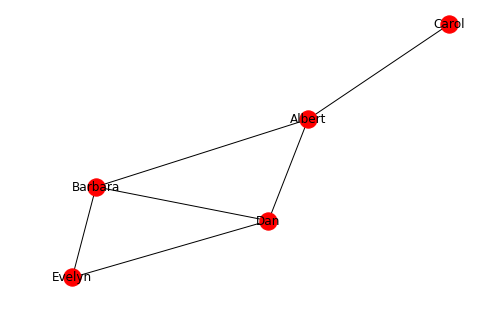

In [35]:
# Visualization
plt.figure()
nx.draw(social_graph,with_labels = True)
plt.show()

### Layout

The layout allows you to visualize the graph (in 2D).

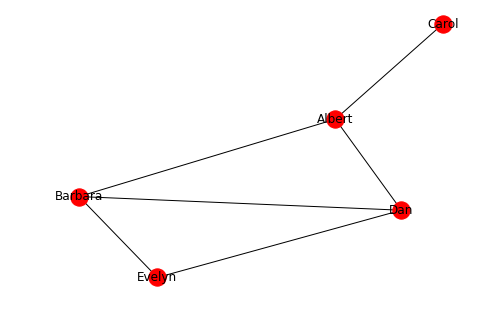

In [36]:
# Layout based on springs (default layout)
plt.figure()
pos = nx.spring_layout(social_graph)
nx.draw(social_graph, pos, with_labels = True)
plt.show()

In [37]:
print (pos)

{'Albert': array([0.07190666, 0.32773582]), 'Evelyn': array([-0.17315299, -0.79192888]), 'Carol': array([0.21954928, 1.        ]), 'Dan': array([ 0.16272976, -0.31622357]), 'Barbara': array([-0.28103271, -0.21958337])}


Observe that two instances of the spring layout are generally not the same!

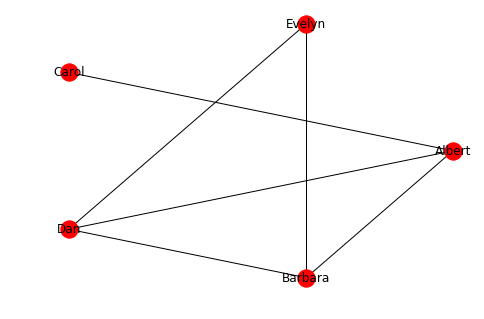

In [44]:
# Another layout
plt.figure()
pos = nx.circular_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)
plt.show()

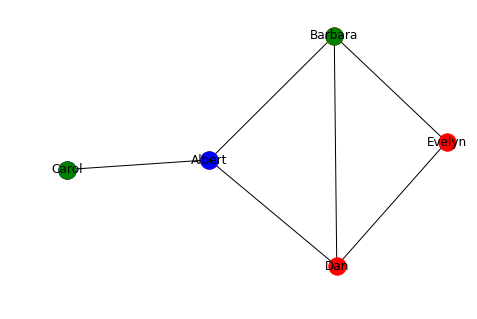

In [45]:
# Changing the color of some nodes
plt.figure()
pos = nx.spring_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)
nodes = nx.draw_networkx_nodes(social_graph, pos, nodelist = ['Albert','Carol'], node_color='blue')
nodes = nx.draw_networkx_nodes(social_graph, pos, nodelist = ['Barbara','Carol'], node_color='green')
plt.show()

### Node labels

In most cases, the $n$ nodes are indexed from 0 to $n-1$. The name of each node (if any) is then stored as a label.

In [46]:
# Indexing nodes
names = list(social_graph.nodes())
social_graph = nx.convert_node_labels_to_integers(social_graph)

In [47]:
names

['Albert', 'Evelyn', 'Carol', 'Dan', 'Barbara']

In [48]:
# Adding names as labels
for i in social_graph.nodes():
    social_graph.node[i]['name'] = names[i]

In [49]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert'}
1 {'name': 'Evelyn'}
2 {'name': 'Carol'}
3 {'name': 'Dan'}
4 {'name': 'Barbara'}


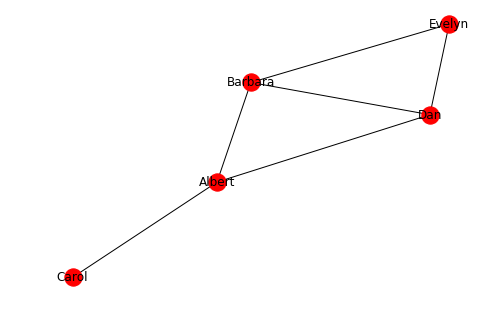

In [52]:
names = nx.get_node_attributes(social_graph,'name')
plt.figure()
nx.draw(social_graph, labels = names)
plt.show()

In [53]:
# Adding other labels
women = ['Barbara', 'Carol','Evelyn']

for u in social_graph.nodes():
    if social_graph.node[u]['name'] in women:
        social_graph.node[u]['gender'] = 'Female'
    else:
        social_graph.node[u]['gender'] = 'Male'

In [54]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'gender': 'Male', 'name': 'Albert'}
1 {'gender': 'Female', 'name': 'Evelyn'}
2 {'gender': 'Female', 'name': 'Carol'}
3 {'gender': 'Male', 'name': 'Dan'}
4 {'gender': 'Female', 'name': 'Barbara'}


In [55]:
# Store the positions as labels
pos = nx.spring_layout(social_graph)
for u in social_graph.nodes():
    social_graph.node[u]['pos'] = tuple(pos[u])

In [56]:
type(pos[0][0])

numpy.float64

In [57]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'gender': 'Male', 'pos': (0.32810535651867834, -0.0713424430712756), 'name': 'Albert'}
1 {'gender': 'Female', 'pos': (-0.7911031956945197, 0.17203735169410586), 'name': 'Evelyn'}
2 {'gender': 'Female', 'pos': (0.9999999999999999, -0.21751264460476596), 'name': 'Carol'}
3 {'gender': 'Male', 'pos': (-0.2205732841308917, 0.2788247344315431), 'name': 'Dan'}
4 {'gender': 'Female', 'pos': (-0.3164288766932669, -0.16200699844960798), 'name': 'Barbara'}


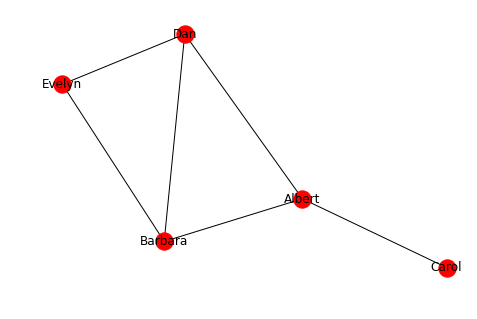

In [60]:
pos = nx.get_node_attributes(social_graph, 'pos')
plt.figure()
nx.draw(social_graph,pos,with_labels = True, labels = names)
plt.show()

### Edge labels

In [61]:
# Adding weights
for u,v in social_graph.edges():
    social_graph[u][v]['weight'] = np.random.randint(1,10)

In [62]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

0 {2: {'weight': 1}, 3: {'weight': 1}, 4: {'weight': 9}}
1 {3: {'weight': 8}, 4: {'weight': 1}}
2 {0: {'weight': 1}}
3 {0: {'weight': 1}, 1: {'weight': 8}, 4: {'weight': 9}}
4 {0: {'weight': 9}, 1: {'weight': 1}, 3: {'weight': 9}}


{(1, 3): 8, (0, 4): 9, (0, 3): 1, (3, 4): 9, (0, 2): 1, (1, 4): 1}


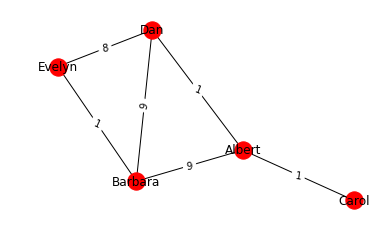

In [63]:
# Visualization with edge weights
weights = nx.get_edge_attributes(social_graph, 'weight')
print(weights)
plt.figure()
nx.draw_networkx_edge_labels(social_graph, pos, edge_labels = weights)
nx.draw(social_graph, pos, labels = names)
plt.show()

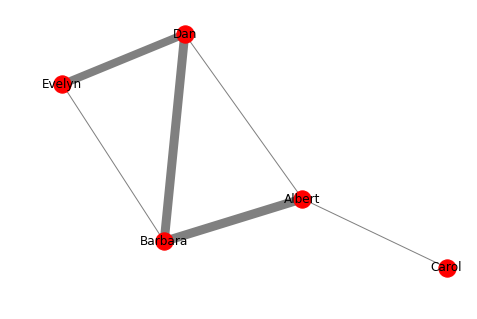

In [64]:
# Visualization with edge widths = edge weights
plt.figure()
weights_list = [weights[e] for e in social_graph.edges()]
nx.draw(social_graph, pos, labels = names, width = weights_list, edge_color = 'grey')
plt.show()

In [65]:
# Adding edge labels
categories = ['Family', 'Work', 'Friend']
for u,v in social_graph.edges():
    social_graph[u][v]['category'] = str(np.random.choice(categories))

In [66]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

0 {2: {'weight': 1, 'category': 'Work'}, 3: {'weight': 1, 'category': 'Friend'}, 4: {'weight': 9, 'category': 'Work'}}
1 {3: {'weight': 8, 'category': 'Friend'}, 4: {'weight': 1, 'category': 'Family'}}
2 {0: {'weight': 1, 'category': 'Work'}}
3 {0: {'weight': 1, 'category': 'Friend'}, 1: {'weight': 8, 'category': 'Friend'}, 4: {'weight': 9, 'category': 'Friend'}}
4 {0: {'weight': 9, 'category': 'Work'}, 1: {'weight': 1, 'category': 'Family'}, 3: {'weight': 9, 'category': 'Friend'}}


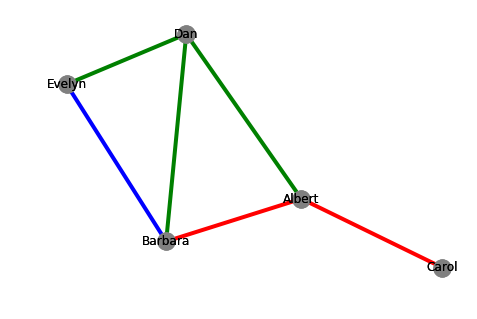

In [73]:
# Visualization with categories
plt.figure()
nx.draw(social_graph, pos, labels = names, node_color = 'grey')

color_map = {'Family': 'b', 'Work': 'r', 'Friend': 'g'}

categories = nx.get_edge_attributes(social_graph, 'category')

edgelists = {}
for u, category in categories.items():
    edgelists.setdefault(category, []).append(u)

nx.draw(social_graph, pos, labels = names, node_color = 'gray')
for category in edgelists:
    edges = nx.draw_networkx_edges(social_graph, pos, edgelist = edgelists[category], width = 4, edge_color = color_map[category])
plt.show()

### Directed graphs

In [92]:
# Building the graph
edges = [(1,3),(3,2),(3,1),(1,4),(3,5),(2,4),(2,5),(4,3),(5,4),(5,6),(6,1)]
digraph = nx.from_edgelist(edges, create_using=nx.DiGraph())
digraph.graph['name'] = "A directed graph"

In [93]:
# Summary (observe the type of graph)
print(nx.info(digraph))

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 11
Average in degree:   1.8333
Average out degree:   1.8333


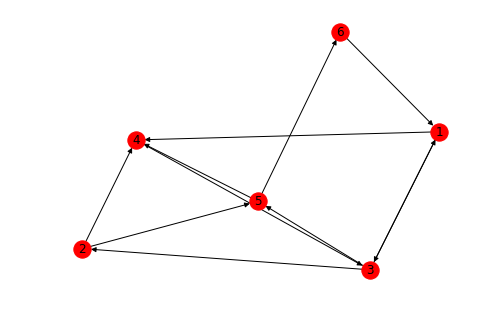

In [95]:
# Visualization
nx.draw(digraph,with_labels = True)
plt.show()

### Writing and reading graphs

The `networkx` package allows you to write and read graphs in many formats. We will use the `graphml` format.

Complex data structures like `tuples` of `lists` are not supported. 

## To do

* Replace the label `pos` by two labels, one per coordinate.
* Save the graph in graphml format.
* Read the graph (use the type `int` for node indices) and check the labels.

In [96]:
for u in social_graph.nodes():
    pos = social_graph.node[u]["pos"]
    social_graph.node[u]["x"] = float(pos[0])
    social_graph.node[u]["y"] = float(pos[1])
    del social_graph.node[u]["pos"]
social_graph.node[0]

{'gender': 'Male',
 'name': 'Albert',
 'x': 0.32810535651867834,
 'y': -0.0713424430712756}

In [97]:
nx.write_graphml(social_graph, "social_graph.graphml")
graph = nx.read_graphml("social_graph.graphml", node_type = int)

In [98]:
graph.node[0]

{'gender': 'Male',
 'name': 'Albert',
 'x': 0.32810535651867834,
 'y': -0.0713424430712756}

## 2. Datasets

You will now work on two real datasets, OpenStreet and Openflights, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab1.zip).

### OpenStreet

OpenStreet is a graph of streets in the center of Paris. Nodes correspond to intersections. The graph is directed due to one-way streets. Weights correspond to distances between intersections  (in meters). Source: [Open Street Map](http://openstreetmap.fr)

In [99]:
# First download the datasets!
openstreet = nx.read_graphml("../openstreet.graphml", node_type = int)

In [100]:
print (nx.info(openstreet))

Name: openstreet
Type: DiGraph
Number of nodes: 6025
Number of edges: 8170
Average in degree:   1.3560
Average out degree:   1.3560


In [101]:
# Get positions
pos_x = nx.get_node_attributes(openstreet,'pos_x')
pos_y = nx.get_node_attributes(openstreet,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openstreet.nodes()}

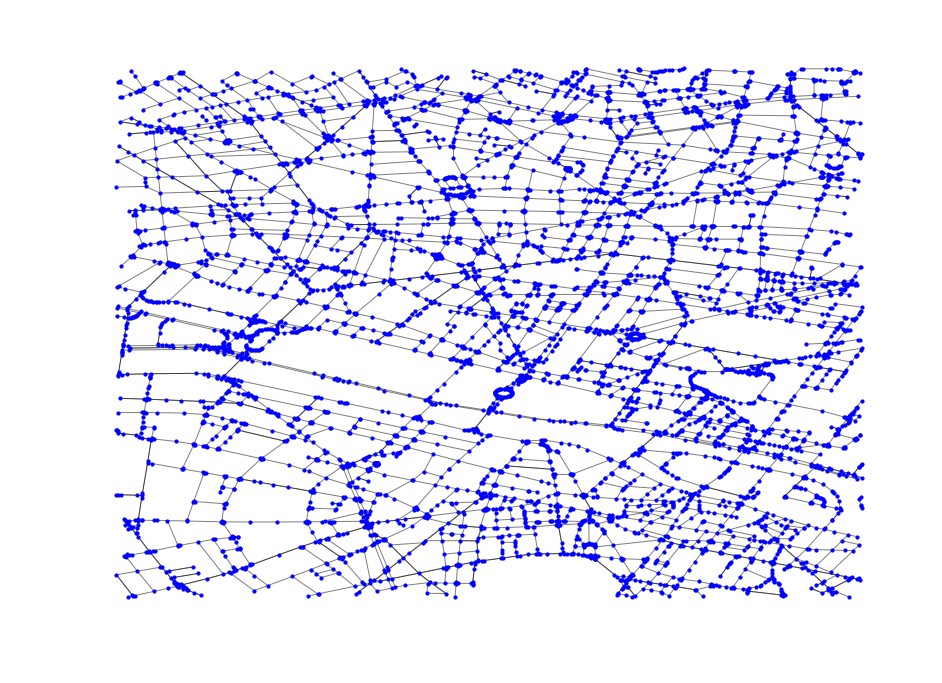

In [102]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

In [103]:
# A shortest path 
path = nx.shortest_path(openstreet, 0, 1000, weight = 'weight')
path

[0,
 4959,
 1,
 5110,
 2,
 5102,
 426,
 350,
 2373,
 98,
 3427,
 395,
 2957,
 394,
 1690,
 393,
 2237,
 3,
 392,
 4998,
 391,
 4,
 398,
 2955,
 30,
 2954,
 5340,
 397,
 396,
 2349,
 32,
 5012,
 2343,
 2303,
 5844,
 450,
 190,
 451,
 5846,
 5894,
 100,
 2342,
 5895,
 2924,
 5782,
 2133,
 2404,
 2407,
 2394,
 2410,
 2408,
 2409,
 5785,
 5786,
 2493,
 5144,
 2411,
 2497,
 5145,
 5148,
 2500,
 2428,
 4742,
 822,
 4744,
 5150,
 48,
 5151,
 819,
 818,
 4322,
 817,
 4324,
 8,
 2643,
 4325,
 816,
 4330,
 150,
 4333,
 4341,
 540,
 5839,
 4345,
 4348,
 1662,
 890,
 1664,
 4354,
 2516,
 1665,
 4366,
 542,
 4378,
 4386,
 541,
 3585,
 3346,
 69,
 3349,
 4450,
 891,
 4491,
 2596,
 935,
 199,
 2598,
 934,
 3351,
 125,
 3885,
 3352,
 4552,
 2042,
 2044,
 1811,
 1813,
 4630,
 1009,
 2589,
 1011,
 4624,
 4597,
 1012,
 1000]

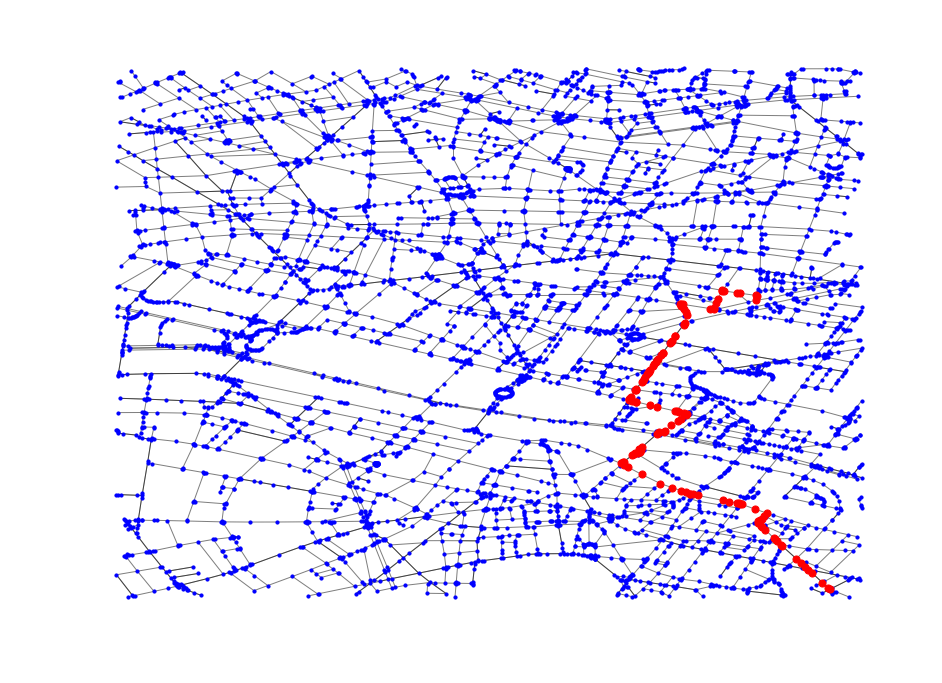

In [104]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openstreet, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

## To do

* Show the shortest path from Pantheon to Gare Saint Lazare.

In [105]:
pos_pantheon = (2.3460785219052, 48.84619085)
pos_gsl = (2.3256200551987, 48.875438014138)

def find_nearest_node(graph, pos):
    # Get positions
    pos_x = nx.get_node_attributes(openstreet,'pos_x')
    pos_y = nx.get_node_attributes(openstreet,'pos_y')
    pos_graph = [(u, (pos_x[u], pos_y[u])) for u in openstreet.nodes()]
    
    return sorted(pos_graph, key = lambda x: (x[1][0]-pos[0])**2 + (x[1][1] - pos[1])**2)[0][0]
    


pantheon = find_nearest_node(openstreet, pos_pantheon)
gsl = find_nearest_node(openstreet, pos_gsl)

In [106]:
openstreet.nodes[gsl]

{'pos_x': 2.32508, 'pos_y': 48.87537}

In [107]:
path = nx.shortest_path(openstreet, pantheon, gsl, weight = 'weight')

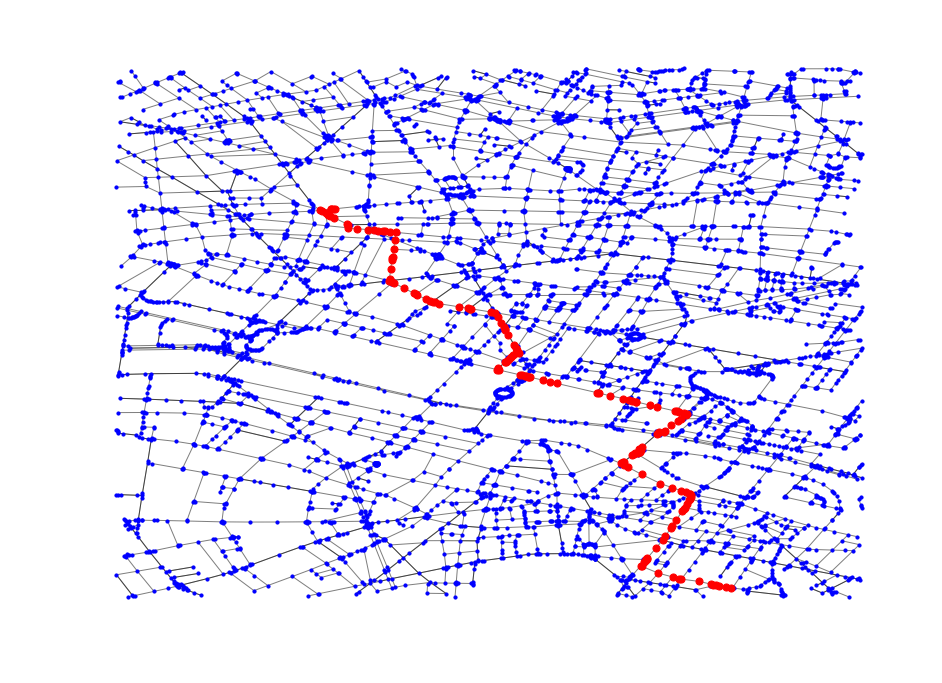

In [108]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openstreet, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

## OpenFlights

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [109]:
openflights = nx.read_graphml("../openflights.graphml", node_type = int)

In [110]:
print(nx.info(openflights))

Name: openflight
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [111]:
# Get node from (partial) name

def get_node_from_name(name):
    list_nodes = []
    for u in openflights.nodes():
        if openflights.node[u]['name'].find(name) >= 0:
            list_nodes.append(u)
    return list_nodes

for u in get_node_from_name('Charles de Gaulle'):
    print (u,openflights.node[u]['name'])

622 Charles de Gaulle International Airport


In [112]:
openflights.node[0]

{'name': 'Goroka Airport', 'pos_x': 145.391998291, 'pos_y': -6.08168983459}

In [113]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

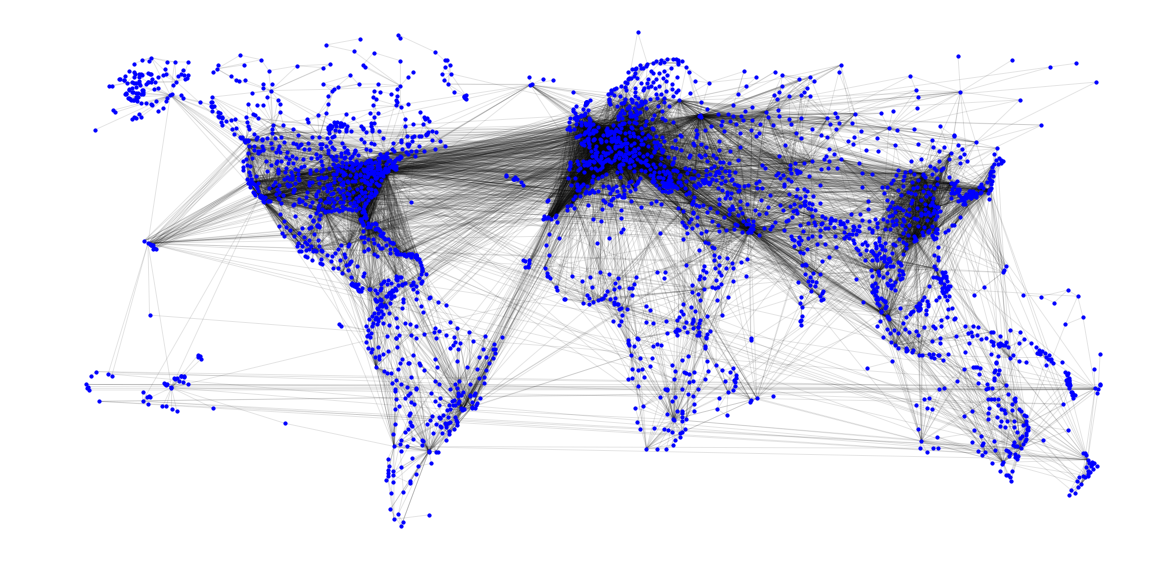

In [114]:
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

## To do

* List the top-10 airports in number of flights and show them on the map.
* Which proportion of traffic is generated by the top-100 airports?

In [162]:
### openflights.degree(weight = "weight") fonctionne pas mal aussi mais chiant a convertir en array

names = nx.get_node_attributes(openflights, "name")

adjacency = nx.to_scipy_sparse_matrix(openflights)
traffic = adjacency.dot(np.ones(adjacency.shape[0]))

best = np.argsort(traffic)
best_n = [names[i] for i in best[-10:]]
best_n

['Beijing Capital International Airport',
 'Dallas Fort Worth International Airport',
 'Atatürk International Airport',
 'Frankfurt am Main International Airport',
 'London Gatwick Airport',
 'Hartsfield Jackson Atlanta International Airport',
 'Munich International Airport',
 'Dublin Airport',
 'Charles de Gaulle International Airport',
 'Amsterdam Airport Schiphol']

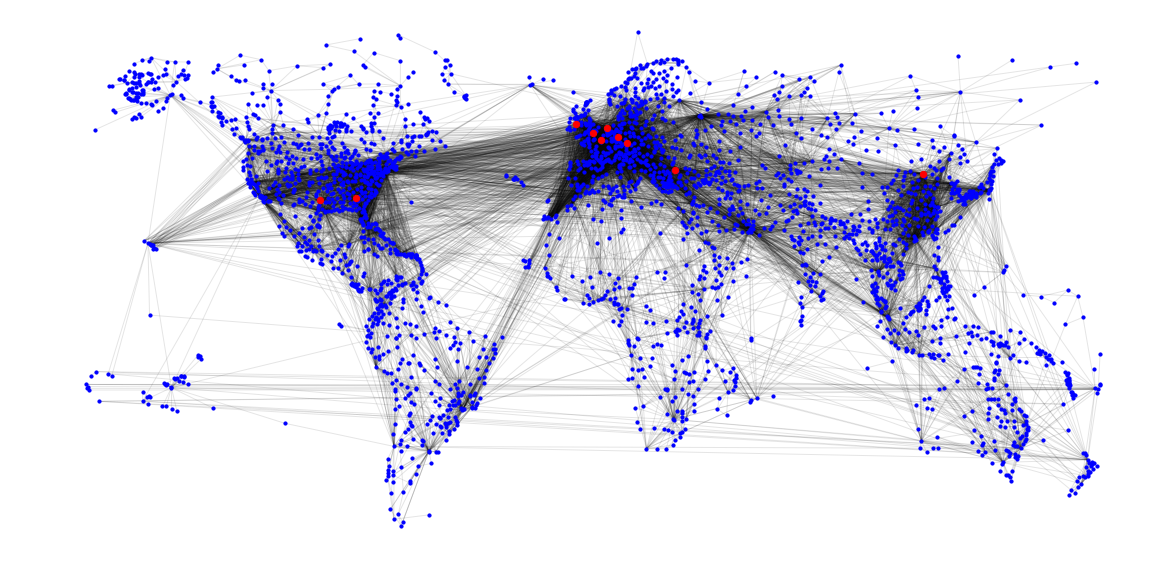

In [171]:
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights, pos, node_size = 40, nodelist = list(best[-10:]), node_color = 'r')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

In [173]:
print("Proportion of traffic :", np.sum(traffic[best[-100:]])/np.sum(traffic))

Proportion of traffic : 0.3402365051161081


# 3. Node and edge sampling

In the rest of the lab, we work on the OpenFlights dataset.

## To do

List:
* 10 random nodes 
* 10 random neighbors
* 10 random ends of random edges

In each case, show both the name of the airport and the degree of the corresponding node.

In [320]:
n = 10

In [353]:
def generate_random_nodes(graph, n):
    nodes = list(graph.nodes())
    random_nodes = np.random.choice(nodes, n)
    return [(u, {"name": names[u], "degree": graph.degree(u)}) for u in random_nodes]

generate_random_nodes(openflights, n)

[(167, {'degree': 1, 'name': 'Kaduna Airport'}),
 (431, {'degree': 38, 'name': 'Quatro de Fevereiro Airport'}),
 (462, {'degree': 2, 'name': 'Bangoka International Airport'}),
 (267, {'degree': 11, 'name': 'Inverness Airport'}),
 (1339, {'degree': 1, 'name': 'Eugenio Maria De Hostos Airport'}),
 (2406, {'degree': 1, 'name': 'Hattiesburg Laurel Regional Airport'}),
 (2569, {'degree': 5, 'name': 'Ust-Kamennogorsk Airport'}),
 (1941, {'degree': 9, 'name': 'Kopitnari Airport'}),
 (1244, {'degree': 1, 'name': 'José Celestino Mutis Airport'}),
 (789, {'degree': 6, 'name': 'Goloson International Airport'})]

In [354]:
def generate_random_neighbors(graph, n):
    nodes = list(graph.nodes())
    random_neighbors = [np.random.choice(np.array(list(graph[np.random.choice(nodes)]))) for i in range(n)]

    return [(u, {"name": names[u], "degree": graph.degree(u)}) for u in random_neighbors]

generate_random_neighbors(openflights, n)

[(33, {'degree': 7, 'name': 'Inuvik Mike Zubko Airport'}),
 (1539, {'degree': 9, 'name': 'Sentani Airport'}),
 (1748,
  {'degree': 31, 'name': 'St Petersburg Clearwater International Airport'}),
 (564, {'degree': 162, 'name': 'Barcelona International Airport'}),
 (189, {'degree': 237, 'name': 'Frankfurt am Main International Airport'}),
 (2234, {'degree': 3, 'name': 'Wapekeka Airport'}),
 (1589, {'degree': 30, 'name': 'Cairns International Airport'}),
 (1688, {'degree': 148, 'name': 'Los Angeles International Airport'}),
 (1727, {'degree': 92, 'name': 'Seattle Tacoma International Airport'}),
 (487, {'degree': 85, 'name': 'Mohammed V International Airport'})]

In [421]:
def generate_random_end(graph, n):
    edges = list(graph.edges())
    np.random.shuffle(edges)
    random_edges = edges[:n]

    random_end = [np.random.choice(e) for e in random_edges]
    return [(u, {"name": names[u], "degree": graph.degree(u)}) for u in random_end]

generate_random_end(openflights, n)

[(517, {'degree': 79, 'name': 'Cairo International Airport'}),
 (1688, {'degree': 148, 'name': 'Los Angeles International Airport'}),
 (1407, {'degree': 65, 'name': 'Koltsovo Airport'}),
 (1421,
  {'degree': 16, 'name': 'Sardar Vallabhbhai Patel International Airport'}),
 (1857, {'degree': 204, 'name': "Chicago O'Hare International Airport"}),
 (1996, {'degree': 11, 'name': 'The Eastern Iowa Airport'}),
 (1842, {'degree': 159, 'name': 'John F Kennedy International Airport'}),
 (1655, {'degree': 147, 'name': 'Shanghai Pudong International Airport'}),
 (1914, {'degree': 129, 'name': 'Incheon International Airport'}),
 (1956, {'degree': 56, 'name': 'Kansai International Airport'}),
 (1470, {'degree': 94, 'name': 'Indira Gandhi International Airport'}),
 (1519, {'degree': 45, 'name': 'Noi Bai International Airport'}),
 (1850, {'degree': 29, 'name': 'Sacramento International Airport'}),
 (2035, {'degree': 15, 'name': 'Lhasa Gonggar Airport'}),
 (192, {'degree': 91, 'name': 'Cologne Bonn Air

## To do 

* Compute the mean and standard deviation of the degrees.
* Display the degree distribution. Can it be considered as a power law?
* Compute the mean and standard deviation of the degree of a random neighbor.
* Compute the mean and standard deviation of the degree of a node sampled from the edges. 
* Interpret the results.
* (optional) Do the same with nodes / edges sampled in proportion to their weights and interpret the results.

Valeur empirique : 11.5264
Valeur réelle : 11.748789150791088


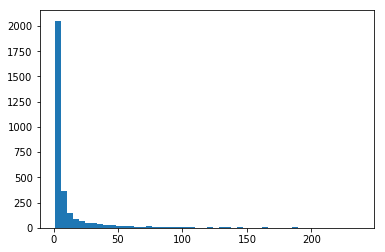

In [419]:
from functools import reduce

sum_degree = lambda x,y: x + y[1]["degree"]
n = 10000

mean_deg = reduce(sum_degree, generate_random_nodes(openflights, n), 0)/n
print("Valeur empirique :", mean_deg)

print("Valeur réelle :", len(openflights.edges)/len(openflights.nodes)*2)
plt.hist(list(map(lambda x:x[1], list(openflights.degree()))), bins = 50)
plt.show()

In [411]:
mean_deg = reduce(sum_degree, generate_random_neighbors(openflights, n), 0)/n
print("Valeur empirique :", mean_deg)

mean_deg = 0

for e in openflights.edges:
    du = openflights.degree(e[0])
    dv = openflights.degree(e[1])
    
    mean_deg += du/dv + dv/du

print("Valeur réelle :", mean_deg/len(openflights.nodes))

Valeur empirique : 57.9625
Valeur réelle : 57.26018528653653


In [424]:
mean_deg = reduce(sum_degree, generate_random_end(openflights, n), 0)/n
print("Valeur empirique :", mean_deg)

mean_X2 = np.sum(list(map(lambda x:x[1]**2, list(openflights.degree()))))/len(openflights.nodes)
mean_X = len(openflights.edges)/len(openflights.nodes)*2


print("Valeur réelle :", mean_X2/mean_X)

Valeur empirique : 63.8007
Valeur réelle : 64.27395151981531
